In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Perceptron class

In [2]:
class Perceptron:
    
    def __init__(self,n):
        '''
        Creates a single n+1 dimensional input perceptron.
        '''        
        #Initialize weights randomly
        self.weights = np.random.normal(scale=0.1, size=n+1)
        self.inputs_y = np.zeros(n+1)
        #Set the input corrresponding to bias as 1
        self.inputs_y[0] = 1                    
        print('Perceptron initialized with',n+1,'weights (including bias) and inputs')
        
    def calculate_activation(self):  
        '''
        Calculates the sigmoid activation output of Perceptron.
        '''        
        self.sum = np.dot(self.weights, self.inputs_y)
        self.output_y = 1/(1+np.exp(-self.sum))
        return self.output_y        
        
    def set_inputs(self, inpt):   
        '''
        Set input for a single datasample.
        '''
        self.inputs_y[1:] = np.asarray(inpt)
        
    def set_target(self, trgt):
        '''
        Set the corresponding label/target for the datasample whose input was set.
        '''        
        self.target = trgt
        
    def update_weights_perceptron_Rule(self):
        '''
        Updates weights using the Unified Perceptron Rule.
        '''        
        if(self.calculate_activation()>=0.5):
            self.weights = self.weights + (self.target-1)*self.inputs_y
        else:
            self.weights = self.weights + (self.target)*self.inputs_y
            
    def update_weights_SGD(self,lr):
        '''
        Updates weights using Stochastic Gradiend Descent ie SGD algorithm.
        '''        
        p = self.calculate_activation()        
        self.weights = self.weights - lr*p*(1-p)*(p-self.target)*self.inputs_y       
            
    def getWeights(self):
        '''
        Returns the present weights (and bias) of the Perceptron.
        '''
        return self.weights  
    
    def trainPerceptron(self,inputs,labels,epochs,lr=0.1,rule='perceptron'): 
        '''
        Trains perceptron on multiple datasamples given in [inputs] using corresponding
        target [labels] for [epochs] epochs. [rule] can be 'perceptron' or 'SGD'.
        [lr] is the lr to be used for weight updates using SGD rule. Default values of lr=0.1
        and rule used is 'perceptron'.
        '''
        total_train_data = labels.shape[0]
        train_acc = []
        epoch=1
        while(epoch<=epochs):            
            correct_classfied = 0            
            for i in range(total_train_data):
                self.set_inputs(inputs[i])
                self.set_target(labels[i])
                out = self.calculate_activation()
                
                #Assign a class based on threshold
                if(out>=0.5):
                    out=1
                else:
                    out=0
                
                #see if class prediction is correct
                if(out==labels[i]):
                    correct_classfied +=1
                    
                #weight updation using Perceptron rule or SGD
                if(rule=='perceptron'):
                    self.update_weights_perceptron_Rule()
                else:
                    self.update_weights_SGD(lr)
                
            #Print the training accuracy for the epoch just completed
            #ie correctly-classified-train-datasamples over total-train-samples
            train_accuracy = correct_classfied/total_train_data
            print("epoch",epoch, "training accuracy",train_accuracy)
            train_acc.append(train_accuracy)
            epoch+=1
        
        return train_acc
        
    def testPerceptron(self, testdata):
        '''
        Test the Perceptron on [testdata] dataset and gives the 
        prediction vector.
        '''
        result = np.empty(0,dtype='int')
        for i in testdata:
            self.set_inputs(i)
            out = self.calculate_activation()
            if(out>=0.5):
                result = np.append(result,1)
            else:
                result = np.append(result,0)
        return result

# Random dataset

In [3]:
x,y = make_classification(n_samples = 100, random_state = 9)
print(x.shape)
print(y.shape)

(100, 20)
(100,)


In [4]:
data_train, data_test, target_train, target_test = train_test_split(x,y,test_size = 0.2 ,random_state = 42) 

# Learning via Perceptron Rule

In [5]:
P = Perceptron(data_train.shape[1])
t1 = P.trainPerceptron(data_train, target_train, 20)   

Perceptron initialized with 21 weights (including bias) and inputs
epoch 1 training accuracy 0.8125
epoch 2 training accuracy 0.85
epoch 3 training accuracy 0.875
epoch 4 training accuracy 0.85
epoch 5 training accuracy 0.8625
epoch 6 training accuracy 0.9
epoch 7 training accuracy 0.9
epoch 8 training accuracy 0.85
epoch 9 training accuracy 0.9125
epoch 10 training accuracy 0.8875
epoch 11 training accuracy 0.925
epoch 12 training accuracy 0.9125
epoch 13 training accuracy 0.9125
epoch 14 training accuracy 0.9375
epoch 15 training accuracy 0.925
epoch 16 training accuracy 0.925
epoch 17 training accuracy 0.9125
epoch 18 training accuracy 0.9125
epoch 19 training accuracy 0.975
epoch 20 training accuracy 0.9


In [6]:
res = P.testPerceptron(data_test)
print("Accuracy ",accuracy_score(target_test, res))
print("Precision for class 0 ",precision_recall_fscore_support(target_test, res) [1][0])
print("Precision for class 1 ",precision_recall_fscore_support(target_test, res) [1][1])

Accuracy  0.8
Precision for class 0  0.7692307692307693
Precision for class 1  0.8571428571428571


# Learning via SGD rule

In [7]:
P = Perceptron(data_train.shape[1])
t2 = P.trainPerceptron(data_train, target_train, 20, lr=0.01, rule='SGD')   

Perceptron initialized with 21 weights (including bias) and inputs
epoch 1 training accuracy 0.725
epoch 2 training accuracy 0.825
epoch 3 training accuracy 0.8375
epoch 4 training accuracy 0.875
epoch 5 training accuracy 0.875
epoch 6 training accuracy 0.9
epoch 7 training accuracy 0.9
epoch 8 training accuracy 0.8875
epoch 9 training accuracy 0.8875
epoch 10 training accuracy 0.9
epoch 11 training accuracy 0.9
epoch 12 training accuracy 0.9125
epoch 13 training accuracy 0.9125
epoch 14 training accuracy 0.9125
epoch 15 training accuracy 0.9125
epoch 16 training accuracy 0.925
epoch 17 training accuracy 0.925
epoch 18 training accuracy 0.925
epoch 19 training accuracy 0.925
epoch 20 training accuracy 0.925


In [8]:
res = P.testPerceptron(data_test)
print("Accuracy ",accuracy_score(target_test, res))
print("Precision for class 0 ",precision_recall_fscore_support(target_test, res) [1][0])
print("Precision for class 1 ",precision_recall_fscore_support(target_test, res) [1][1])

Accuracy  0.95
Precision for class 0  0.9230769230769231
Precision for class 1  1.0


# Comparison

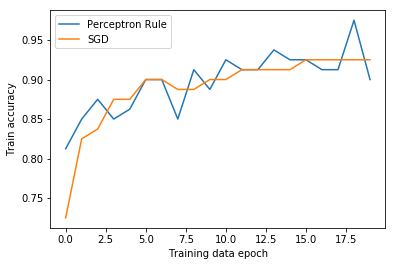

In [9]:
plt.plot(t1, label = "Perceptron Rule")
plt.plot(t2, label = "SGD")
plt.xlabel("Training data epoch")
plt.ylabel("Train accuracy")
plt.legend()